In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import time
import xgboost as xgb
import gc
import pickle
import scipy
from xgboost import XGBRegressor
import numpy as np 
import pandas as pd 
import xgboost as xg 

In [ ]:
# def downcast_dtypes(df):
#     float_cols = [c for c in df if df[c].dtype == "float64"]
#     int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
#     df[float_cols] = df[float_cols].astype(np.float32)
#     df[int_cols] = df[int_cols].astype(np.int16)
#     return df

In [ ]:
data=pd.read_pickle('drive/MyDrive/Datasets-Collab/combined_latest_1.pkl')

In [ ]:
data.drop(['item_cnt_day_lag_5','average_cnt_item_lag_3','average_cnt_item_city_lag_1'],axis=1,inplace=True)

In [ ]:
data.drop(['item_cnt_day_lag_4','average_cnt_shop_item_cat_lag_2','average_cnt_item_lag_3'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
data['holidays_in_month']=data['holidays_in_month'].astype(np.int8)
data['delta_shop_revenue_lag_1']=data['delta_shop_revenue_lag_1'].astype(np.float16)
data['date_block_num']=data['date_block_num'].astype(np.int8)
data['item_id']=data['item_id'].astype(np.int8)
data['shop_id']=data['shop_id'].astype(np.int8)
data['month']=data['month'].astype(np.int8)
data['item_category_id']=data['item_category_id'].astype(np.int8)


In [ ]:
# X_train = data[data.date_block_num < 33].drop(['item_cnt_day'], axis=1)
# Y_train = data[data.date_block_num < 33]['item_cnt_day'].clip(0, 20).values
# X_valid = data[data.date_block_num == 33].drop(['item_cnt_day'], axis=1).values
# Y_valid = data[data.date_block_num == 33]['item_cnt_day'].clip(0, 20).values
# X_test = data[data.date_block_num == 34].drop(['item_cnt_day'], axis=1).to_numpy()



In [ ]:
train_dmatrix=xg.DMatrix(data[data.date_block_num < 33].drop(['item_cnt_day'], axis=1),label=data[data.date_block_num < 33]['item_cnt_day'].clip(0, 20))
val_dmatrix=xg.DMatrix(data[data.date_block_num == 33].drop(['item_cnt_day'], axis=1),label=data[data.date_block_num == 33]['item_cnt_day'].clip(0, 20))


In [ ]:
del data
gc.collect()

88

In [ ]:
ts = time.time()

model = XGBRegressor(
    max_depth=7,
    n_estimator=200,
    subsample=0.8, 
    eta=0.1,
    min_child_weight=0.5
    colsample_bytree=0.8
)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

In [ ]:

Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": df_test.index, 
    "item_cnt_month": Y_test
})

In [ ]:
submission.to_csv('xgb_submission | lagged features.csv', index=False)

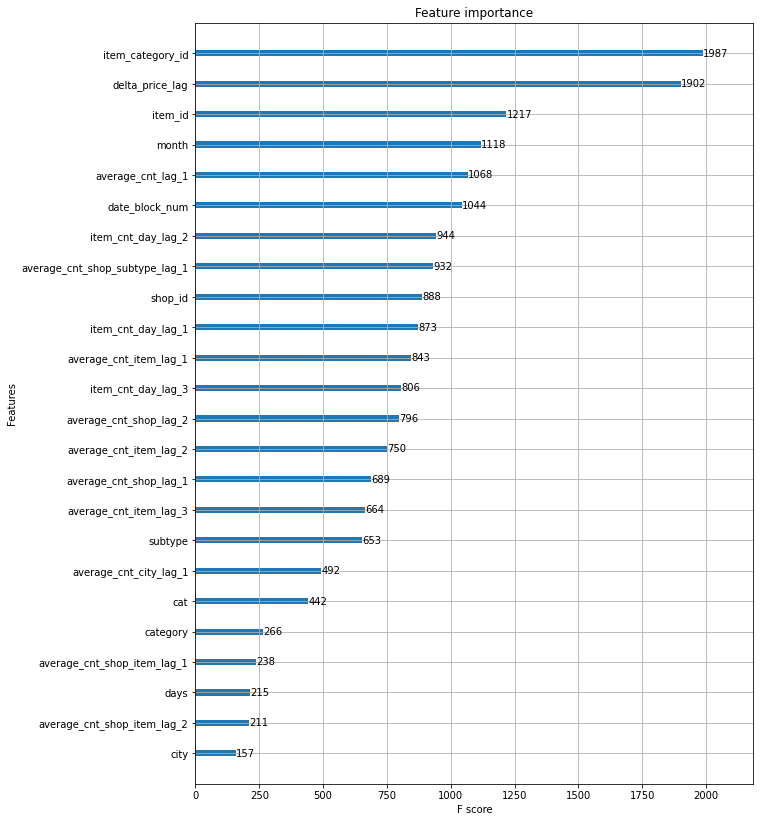

In [ ]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))